# DUMBBELL

<p>
Dumbbell is a channel between salty/fresh reservoirs on either
end where salinity is being damped towards a +1/-1 PSU target value 
with a fast damping timescale of 1 day. The equation of state is linear 
dRho_DS=1.0 kg m-3 PSU-1 , on an f-plane. The first  baroclinic deformation
radius is about 15 km and the channel with is 70km. 
</p>


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
geom=nc.Dataset('../z/ocean_geometry.nc')
geom_=nc.Dataset('ocean_geometry.nc')



In [4]:
px=geom.variables['lonq']
py=geom.variables['latq']
pxc=geom.variables['lonh']
pyc=geom.variables['lath']
pwet=geom.variables['wet']

x=geom_.variables['lonq']
y=geom_.variables['latq']
xc=geom_.variables['lonh']
yc=geom_.variables['lath']
wet=geom_.variables['wet']

In [5]:
#Return the RMS relative vorticity error (10**-4 s-1)
def rvError():
    is_=np.where(px>=x[0])[0][0]
    ie_=np.where(px>=x[-1])[0][0]
    prv_=prv[:,:,:,is_:ie_+1]
    diff=1.e4*(rv[:]-prv_)
    return diff.std()


In [29]:
Prog=nc.Dataset('../z/prog_30.nc')
prv=Prog.variables['RV']
ptime=Prog.variables['Time']
Fam='3'
ERR=np.zeros(16).reshape((4,4))

In [30]:
for j in np.arange(4):
    for i in np.arange(4):
        path=Fam+'.'+str(i)+'.'+str(j)
        try:
            prog=nc.Dataset(path+'/prog.nc')
            rv=prog.variables['RV']
            time=prog.variables['Time']
            res=rvError()
        except:
            res=-999.
        ERR[i,j]=res
        prog.close()

In [31]:
ERR=np.ma.masked_where(ERR==-999.,ERR)
sk=2.0-ERR
sk[sk<0.]=0.

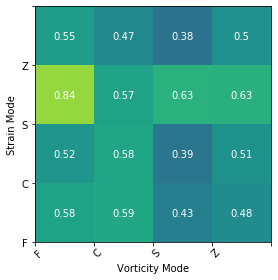

In [32]:
fig,ax = plt.subplots()
img=ax.imshow(sk.T,origin='lower',vmin=0.0,vmax=1.0,cmap=plt.cm.viridis)
ax.set_xticks(np.arange(-.5,4.5))
ax.set_yticks(np.arange(-.5,4.5))
ax.set_xticklabels(['F','C','S','Z'])
ax.set_yticklabels(['F','C','S','Z'])
for j in np.arange(4):
    for i in np.arange(4):
        if ERR[i,j]:
            ax.text(i,j,str(int(sk[i,j]*1e2)*1.e-2)[:4],ha="center",va="center",color="w")
plt.setp(ax.get_xticklabels(), rotation=45, ha="center",
         rotation_mode="anchor")
ax.set_xlabel('Vorticity Mode')
ax.set_ylabel('Strain Mode')
#plt.colorbar(img)
fig.tight_layout()
plt.savefig('score.Fam.'+str(Fam)+'.png')

In [24]:
path

'3.1.0'